# Pratique des modèles linéaires généralisés <a class="tocSkip"> 

**30 novembre 2020** 

Cette série d'exercices vise à participer à la compréhension de la théorie des GLM, à mettre en oeuvre les méthodes sous Python, dans différents cas de figures de modèles statistiques et de jeux de données. 
On utiliserala librairie statsmodels, qui permet d'obtenir des résultats suivant une syntaxe et des présentations proches de celles de R. 

De plus, votre serviteur vous fournit plusieurs fonctions utilitaires pour afficher des résumés statistiques et des graphiques dans la librairie `GLMRegression_in_Python_like_in_R`. Vous êtes invités à consulter le source des fonctions qui vous sont fournies. 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Préparation" data-toc-modified-id="Préparation-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Préparation</a></span></li><li><span><a href="#Proba-de-survie-sur-le-Titanic" data-toc-modified-id="Proba-de-survie-sur-le-Titanic-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Proba de survie sur le Titanic</a></span><ul class="toc-item"><li><span><a href="#Lecture-et-analyse-des-données" data-toc-modified-id="Lecture-et-analyse-des-données-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lecture et analyse des données</a></span></li><li><span><a href="#Modèle-de-régression-logistique" data-toc-modified-id="Modèle-de-régression-logistique-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Modèle de régression logistique</a></span></li><li><span><a href="#Régression-binomiale" data-toc-modified-id="Régression-binomiale-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Régression binomiale</a></span><ul class="toc-item"><li><span><a href="#Données-binomiales" data-toc-modified-id="Données-binomiales-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Données binomiales</a></span></li></ul></li><li><span><a href="#Regroupements" data-toc-modified-id="Regroupements-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Regroupements</a></span></li><li><span><a href="#Régressions-binomiales" data-toc-modified-id="Régressions-binomiales-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Régressions binomiales</a></span></li></ul></li><li><span><a href="#Crimes-sur-les-campus" data-toc-modified-id="Crimes-sur-les-campus-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Crimes sur les campus</a></span><ul class="toc-item"><li><span><a href="#Lecture-et-analyse" data-toc-modified-id="Lecture-et-analyse-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Lecture et analyse</a></span></li><li><span><a href="#Modèle-de-Poisson" data-toc-modified-id="Modèle-de-Poisson-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Modèle de Poisson</a></span><ul class="toc-item"><li><span><a href="#Notion-de--modèle-de-Poisson-et-d'offset" data-toc-modified-id="Notion-de--modèle-de-Poisson-et-d'offset-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Notion de  modèle de Poisson et d'offset</a></span></li><li><span><a href="#Régression-de-Poisson" data-toc-modified-id="Régression-de-Poisson-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Régression de Poisson</a></span></li><li><span><a href="#Régression-avec-une-binomiale-négative" data-toc-modified-id="Régression-avec-une-binomiale-négative-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Régression avec une binomiale négative</a></span></li></ul></li></ul></li><li><span><a href="#Réussite-en-maths" data-toc-modified-id="Réussite-en-maths-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Réussite en maths</a></span><ul class="toc-item"><li><span><a href="#Lecture-et-analyse" data-toc-modified-id="Lecture-et-analyse-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Lecture et analyse</a></span></li><li><span><a href="#Régression" data-toc-modified-id="Régression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Régression</a></span></li></ul></li><li><span><a href="#Richesse-écologique" data-toc-modified-id="Richesse-écologique-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Richesse écologique</a></span><ul class="toc-item"><li><span><a href="#Lecture-et-analyse" data-toc-modified-id="Lecture-et-analyse-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Lecture et analyse</a></span><ul class="toc-item"><li><span><a href="#Tracés" data-toc-modified-id="Tracés-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Tracés</a></span></li><li><span><a href="#Tests-statistiques" data-toc-modified-id="Tests-statistiques-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Tests statistiques</a></span></li></ul></li><li><span><a href="#Premier-modèle." data-toc-modified-id="Premier-modèle.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Premier modèle.</a></span></li><li><span><a href="#2e-modèle" data-toc-modified-id="2e-modèle-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>2e modèle</a></span></li><li><span><a href="#diagnostic" data-toc-modified-id="diagnostic-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>diagnostic</a></span><ul class="toc-item"><li><span><a href="#Tracez-les-quelques-figures-de-diagnostic" data-toc-modified-id="Tracez-les-quelques-figures-de-diagnostic-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Tracez les quelques figures de diagnostic</a></span></li><li><span><a href="#Exploitation-des-prédictions" data-toc-modified-id="Exploitation-des-prédictions-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Exploitation des prédictions</a></span></li></ul></li></ul></li><li><span><a href="#Quine-Data" data-toc-modified-id="Quine-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Quine Data</a></span></li><li><span><a href="#Régression-linéaire" data-toc-modified-id="Régression-linéaire-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Régression linéaire</a></span></li></ul></div>

In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
#
from GLMRegression_in_Python_like_in_R import GLMsummary, glm_residplot
from LinearRegression_in_Python_like_in_R import lm, summary, vif

## Préparation

Consulter la description et la syntaxe de la fonction GLM de statsmodels à cette adresse : https://www.statsmodels.org/stable/glm.html
Avec les méthodes et attributs associés au modèle : https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLMResults.html#statsmodels.genmod.generalized_linear_model.GLMResults

Vous pourrez également consulter avec intérêt l'aide du pendant R. : https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/glm

Il est possible d'utiliser l'approche "formule" dans glm ou lm (modèle linéaire) : celle-ci consiste à préciser la variable réponse et les variables indépendantes. Prenez le temps de consulter la syntaxe ici : https://www.statsmodels.org/stable/example_formulas.html
Vous pourrez effectuer quelque chose comme
```
glm('response ~ predictor1 + predictor2 + C(predictor3) + predictor4*predictor5 -1', data=DATA)
```

## Proba de survie sur le Titanic

Dans cet exercice, nous allons revoir la régression logistique, sous l'angle d'un GLM, puis transformer le problème pour faire apparaître une véritable régression biomiale, qui sera bien entendu traitée avec un GLM. 

Cet exercice est inspiré du post suivant :
https://towardsdatascience.com/the-binomial-regression-model-everything-you-need-to-know-5216f1a483d3
dans lequel il y a des choses intéressantes, mais également d'autres assez discutables.  


### Lecture et analyse des données

>Vous commencerez par charger le fichier de données, `titanic.csv`, afficherez les premères lignes et les infos de type des données. Quelles sont les données quantitatives, catégorielles, ordinales ? 

In [2]:
csv = pd.read_csv("titanic.csv")
csv.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


> Pour des questions pratiques, renommer les colonnes `'Siblings/Spouses Aboard', 'Parents/Children Aboard'` en 
`'ParentsChildrenAboard', 'SiblingsSpousesAboard'`

In [5]:
csv = csv.rename(columns={"Siblings/Spouses Aboard":"SiblingsSpousesAboard","Parents/Children Aboard":"ParentsChildrenAboard"})
csv

,Survived,Pclass,Name,Sex,Age,SiblingsSpousesAboard,ParentsChildrenAboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


### Modèle de régression logistique

>On s'intéresse évidemment à la survie en fonction des autres paramètres. La variable `Survived` est une variable binaire (de Bernouilli) ; et on va mettree n oeuvre une régressoin logistique comme on l'a vu lors du TP précédent. 
>
>Simplement, plutôt que de construire les matrices endog et exog, nous allons utiliser la version "formule" en utilisant la méthode `smf.glm(..)`. 
>
>  -  a) Utiliser cette fonction pour définir le modèle puis l'apprendre.
>  -  b) Vous pourrez ensuite afficher les caractéristiques  avec la méthode `.summary()` ou utiliser la fonction fournie `GLMsummary`. 

In [6]:
sm_titanic = smf.glm(formula="Survived ~ Sex + Pclass + Age + SiblingsSpousesAboard + ParentsChildrenAboard + Fare",data = csv,family=sm.families.Binomial())
result = sm_titanic.fit()
GLMsummary(result)

Dep. Variable:,Survived,No. Observations:,887
Model:,GLM,Df Residuals:,880
Model Family:,Binomial,Df Model:,6
Link Function:,logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-390.47
Date:,"Wed, 24 Nov 2021",Deviance:,780.93
Time:,09:21:35,Pearson chi2:,913.
No. Iterations:,5,,
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,5.2973,0.557,9.503,0.000,4.205,6.390,2.032620e-21,***
Sex[T.male],-2.7573,0.200,-13.758,0.000,-3.150,-2.364,4.573323e-43,***
Pclass,-1.1777,0.146,-8.062,0.000,-1.464,-0.891,7.519353e-16,***
Age,-0.0435,0.008,-5.629,0.000,-0.059,-0.028,1.808900e-08,***
SiblingsSpousesAboard,-0.4018,0.111,-3.630,0.000,-0.619,-0.185,2.839472e-04,***
ParentsChildrenAboard,-0.1065,0.119,-0.898,0.369,-0.339,0.126,3.691266e-01,
Fare,0.0028,0.002,1.166,0.244,-0.002,0.007,2.436801e-01,


> Quelles sont les variables qui ne semblent pas significatives ? Supprimez les du modèle et réitérez. 

In [8]:
new_sm_titanic = smf.glm(formula="Survived ~ Sex + Pclass + Age + SiblingsSpousesAboard",data=csv,family=sm.families.Binomial())
new_result = new_sm_titanic.fit()
GLMsummary(new_result)

Dep. Variable:,Survived,No. Observations:,887
Model:,GLM,Df Residuals:,882
Model Family:,Binomial,Df Model:,4
Link Function:,logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-391.44
Date:,"Wed, 24 Nov 2021",Deviance:,782.88
Time:,09:25:26,Pearson chi2:,922.
No. Iterations:,5,,
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,5.5321,0.505,10.960,0.000,4.543,6.521,5.949422e-28,***
Sex[T.male],-2.7365,0.196,-13.981,0.000,-3.120,-2.353,2.037770e-44,***
Pclass,-1.2651,0.127,-9.960,0.000,-1.514,-1.016,2.281359e-23,***
Age,-0.0437,0.008,-5.679,0.000,-0.059,-0.029,1.358649e-08,***
SiblingsSpousesAboard,-0.4078,0.105,-3.876,0.000,-0.614,-0.202,1.060823e-04,***


> Comparez les AIC dans les deux cas. Ceci confirme-t-il l'intérêt de supprimer ces variables ?

In [ ]:
"Oui, l'AIC a baissé, cela indique un meilleur modèle. Ceci dit, la variation est très faible, ce n'est pas absolument significatif." 

> calculer la table de confusion, avec un seuil à 0.5, et l'*accuracy*

In [9]:
prediction = new_result.predict()

In [13]:
tab = pd.crosstab(csv["Survived"] , prediction > 0.5)
tab

col_0,False,True
Survived,,
0,472,73
1,100,242


In [14]:


accuracy = np.sum(np.diag(tab))/np.sum(np.sum(tab))
accuracy

0.8049605411499436

### Régression binomiale

Il y a parfois des observations multiples correspondant à une même situation : par exemples deux hommes de même age, dans la même classe et avec leur épouse à bord. Avec deux résultats de survie différents. A l'intérieur d'une même catégorie, on va donc avoir des survivants et d'autre pas. Il s'agit d'un ensemble de résultats de Bernouilli, et ceci correspond à un loi binomiale, qui mesure le nombre de "succès" (ou d'échecs) parmi $n$ essais. 

Pour être plus proche de cette situation, nous allons transformer les données afin d'obtenir des catégories plus importantes (quantitativement) et peut-être rendre la prédiction plus robuste d'ailleurs. 

#### Données binomiales
> On va créer des catégories d'age de 5 ans (de 0 à5, de 5 à 10, de 10 à 15, etc). Vous utiliserez pour ce faire la fonction `pd.cut(..)` etg ajouterez une colonne `Age_Range`à notre dataframe. 

In [17]:
#define the bins
age_range_bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
#define the label for each bin. Num labels = Num bins - 1
age_range_labels=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
#Cut up the age range into multiple bins and stuff them into a new Age_Range column
csv['AgeRange'] = pd.cut(csv["Age"],age_range_bins,labels=age_range_labels)
csv


,Survived,Pclass,Name,Sex,Age,SiblingsSpousesAboard,ParentsChildrenAboard,Fare,AgeRange
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,25
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,40
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,30
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,35
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,35
...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,30
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,20
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,10
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,30


### Regroupements

> On va maintenant regrouper les données par mêmes (Class, Sex, et Age_Range). 
> Il s'agira de compter a) le nombre d'individus dans chacune de ces catégories, b)le nombre de survivants (et par différence de morts). Il vous faut obtenir un tableau ['Pclass', 'Sex', 'Age_Range', 'Survived', 'Died', 'Total']. On peut s'y prendre avec des groupby, et utiliser les fonctions d'aggrégation 'sum' et 'count'. On peut aussi faire cela avec une table croisée dynamique `pivot_table`

> Si vous utilisez la table croisée, les commandes suivantes
>```
pt.columns = pt.columns.to_flat_index()
pt.reset_index(inplace=True)
>```
>permettent d'applatir les index de colonne et de lignes. 

In [63]:
pivot_t = csv.pivot_table(index=["Pclass","Sex","AgeRange"],values=["Survived"],aggfunc=['sum','count'])


In [64]:
pivot_t

sum    count
                       Survived Survived
Pclass Sex    AgeRange                  
1      female 5               0        1
              15              2        2
              20             11       11
              25             14       15
              30              7        7
...                         ...      ...
3      male   55              0        5
              60              0        2
              65              0        2
              70              0        2
              75              0        2

[78 rows x 2 columns]

In [65]:
pivot_t.columns = pivot_t.columns.to_flat_index()
pivot_t.reset_index(inplace=True)
pivot_t

,Pclass,Sex,AgeRange,"(sum, Survived)","(count, Survived)"
0,1,female,5,0,1
1,1,female,15,2,2
2,1,female,20,11,11
3,1,female,25,14,15
4,1,female,30,7,7
...,...,...,...,...,...
73,3,male,55,0,5
74,3,male,60,0,2
75,3,male,65,0,2
76,3,male,70,0,2


In [66]:
pivot_t.columns = ["Pclass","Sex","AgeRange","Survived","Total"]
pivot_t["Died"] = pivot_t["Total"] - pivot_t["Survived"]
pivot_t

,Pclass,Sex,AgeRange,Survived,Total,Died
0,1,female,5,0,1,1
1,1,female,15,2,2,0
2,1,female,20,11,11,0
3,1,female,25,14,15,1
4,1,female,30,7,7,0
...,...,...,...,...,...,...
73,3,male,55,0,5,5
74,3,male,60,0,2,2
75,3,male,65,0,2,2
76,3,male,70,0,2,2


> Lorsque votre table a été créée, contrôler quels sont le stypes de vos différentes colonnes. Age_range et Sex devraient être des catégories

In [67]:
pivot_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
Pclass      78 non-null int64
Sex         78 non-null object
AgeRange    78 non-null category
Survived    78 non-null int64
Total       78 non-null int64
Died        78 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 4.0+ KB


In [68]:
pivot_t.Sex = pivot_t.Sex.astype("category")
pivot_t.Pclass = pivot_t.Pclass.astype('category')

In [69]:
pivot_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
Pclass      78 non-null category
Sex         78 non-null category
AgeRange    78 non-null category
Survived    78 non-null int64
Total       78 non-null int64
Died        78 non-null int64
dtypes: category(3), int64(3)
memory usage: 3.1 KB


### Régressions binomiales

> Mettre en oeuvre une régression binomiale en cherchant à modéliser le couple (Survie, Décès). Ceci conduit le glm à modéliser la proportion des Survies. Pour utiliser le glm, il faut spécifier `Survived + Died ~ ` dans la formule. 

In [70]:
model = smf.glm(formula="Survived + Died ~ Pclass + AgeRange + Sex", data = pivot_t,family=sm.families.Binomial())
model_res = model.fit()

> Afficher les résumés des résulats avec `GLMsummary`

In [71]:
GLMsummary(model_res)

Dep. Variable:,"['Survived', 'Died']",No. Observations:,78
Model:,GLM,Df Residuals:,59
Model Family:,Binomial,Df Model:,18
Link Function:,logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-113.95
Date:,"Wed, 24 Nov 2021",Deviance:,129.58
Time:,10:01:43,Pearson chi2:,200.
No. Iterations:,21,,
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,4.4720,0.475,9.422,0.000,3.542,5.402,4.443562e-21,***
Pclass[T.2],-1.2785,0.274,-4.670,0.000,-1.815,-0.742,3.008150e-06,***
Pclass[T.3],-2.4451,0.263,-9.285,0.000,-2.961,-1.929,1.610693e-20,***
AgeRange[T.10],-2.0555,0.637,-3.225,0.001,-3.305,-0.806,1.259550e-03,**
AgeRange[T.15],-1.5214,0.654,-2.326,0.020,-2.803,-0.239,2.001744e-02,*
AgeRange[T.20],-1.6749,0.441,-3.801,0.000,-2.539,-0.811,1.440349e-04,***
AgeRange[T.25],-1.8930,0.427,-4.428,0.000,-2.731,-1.055,9.504195e-06,***
AgeRange[T.30],-1.5897,0.427,-3.721,0.000,-2.427,-0.752,1.981227e-04,***
AgeRange[T.35],-1.1639,0.447,-2.601,0.009,-2.041,-0.287,9.297435e-03,**
AgeRange[T.40],-2.2660,0.480,-4.721,0.000,-3.207,-1.325,2.352508e-06,***


In [72]:
prediction = model_res.predict()

In [73]:
tab = pd.crosstab(pivot_t["Survived"] , prediction > 0.5)
tab

col_0,False,True
Survived,,
0,17,2
1,8,3
2,5,5
3,2,1
4,2,0
5,0,5
6,2,4
7,1,2
8,3,1


In [74]:

accuracy = np.sum(np.diag(tab))/np.sum(np.sum(tab))
accuracy

0.2564102564102564

> Que pensez vous du nbombre de coefficients obtenus. Sont-ils significatifs ? Quel est l'AIC du modèle ? Comparer le (et donc la vraisemblence) à celui obtenu sans regrouper les données. Etait-ce une idée raisonnable ? 

Afin de réduire  le nombre de coefficients, et peut-être d'améliorer les performances du modèle, on va quand même encoder nos variables ordinales `Age_range` et `Pclass` (cela se discute plus) avec des entiers. 

> Si ce n'est pas déjà le cas, encoder chacune des classes d'âge par un entier correspondant à la borne sup (ou inf si vous le souhaitez) de la classe. De même pour les classes. Assurez vous que les types correspondants dans le dataframe soeint bien entiers. `.replace({dictionnaire de corerspondances})` et `.astype(int)` 

In [75]:
pivot_t.Pclass = pivot_t.Pclass.astype("int64")
pivot_t.AgeRange = pivot_t.AgeRange.astype("int64")
pivot_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
Pclass      78 non-null int64
Sex         78 non-null category
AgeRange    78 non-null int64
Survived    78 non-null int64
Total       78 non-null int64
Died        78 non-null int64
dtypes: category(1), int64(5)
memory usage: 3.3 KB


> Mettre en oeuvre un glm sur ces nouvelles données. Affichier les résultats et comparer les AIC. 

In [76]:
new_model = smf.glm(formula="Survived + Died ~ Pclass + AgeRange + Sex", data = pivot_t,family=sm.families.Binomial())
new_model_res = new_model.fit()
GLMsummary(new_model_res)



Dep. Variable:,"['Survived', 'Died']",No. Observations:,78
Model:,GLM,Df Residuals:,74
Model Family:,Binomial,Df Model:,3
Link Function:,logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-128.08
Date:,"Wed, 24 Nov 2021",Deviance:,157.85
Time:,10:01:55,Pearson chi2:,166.
No. Iterations:,5,,
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,4.9231,0.474,10.379,0.000,3.993,5.853,3.081016e-25,***
Sex[T.male],-2.5855,0.187,-13.838,0.000,-2.952,-2.219,1.495428e-43,***
Pclass,-1.2250,0.125,-9.822,0.000,-1.469,-0.981,9.087793e-23,***
AgeRange,-0.0340,0.007,-4.745,0.000,-0.048,-0.020,2.089135e-06,***


In [77]:
prediction = new_model_res.predict()
tab = pd.crosstab(pivot_t["Survived"] , prediction > 0.5)
print(tab)
accuracy = np.sum(np.diag(tab))/np.sum(np.sum(tab))
accuracy


col_0     False  True 
Survived              
0            16      3
1             9      2
2             5      5
3             1      2
4             2      0
5             0      5
6             3      3
7             1      2
8             4      0
9             0      3
11            1      2
12            0      4
13            0      1
14            0      3
17            0      1


0.23076923076923078

In [85]:
model = smf.glm(formula="Survived + Died ~ Pclass + AgeRange + Sex", data = pivot_t,family=sm.families.Binomial())
model_res = model.fit()

In [86]:
prediction = model_res.predict()
tab = pd.crosstab(pivot_t["Survived"] , prediction > 0.5)
print(tab)
accuracy = np.sum(np.diag(tab))/np.sum(np.sum(tab))
accuracy

col_0     False  True 
Survived              
0            16      3
1             9      2
2             5      5
3             1      2
4             2      0
5             0      5
6             3      3
7             1      2
8             4      0
9             0      3
11            1      2
12            0      4
13            0      1
14            0      3
17            0      1


0.23076923076923078

> Afficher les figures de diagnostic, via `glm_residplot`. Cela confirme t-il qu'on peut utilise ce modèle ?   

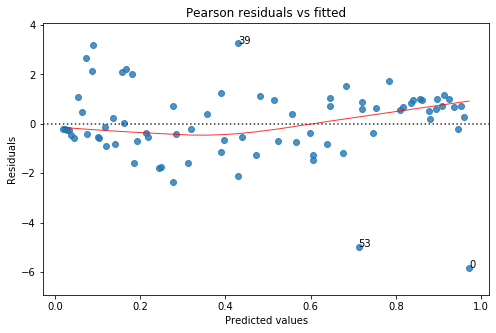

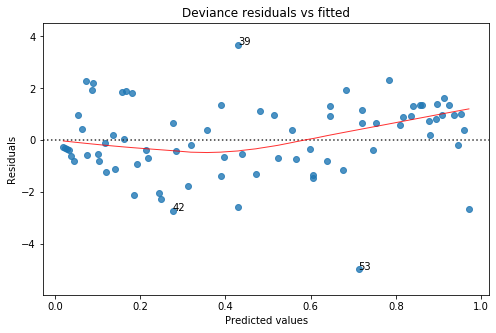

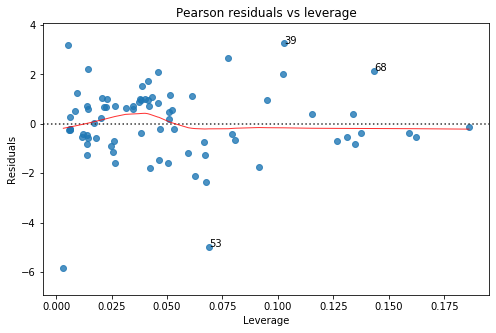

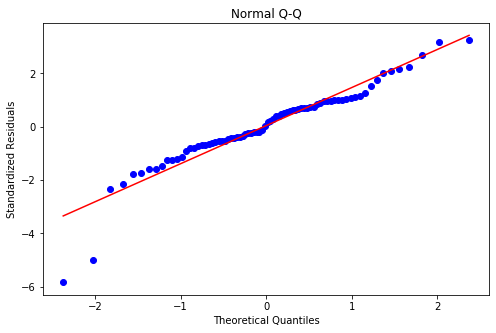

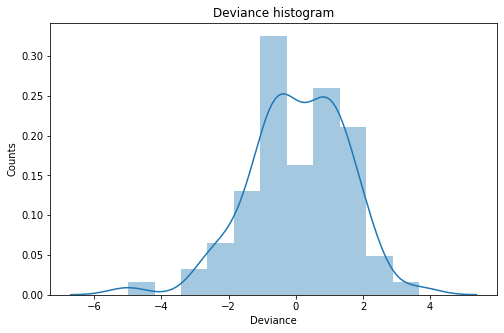

In [88]:
fig = glm_residplot(model_res)

In [82]:
"Réponse : oui"

'Réponse : oui'

> Enfin, on va définir un modèle agissant sur le s*proportions*. Pour cela, défiir une nouvelle colonne `PropSurvived` contenant les rapports Survived/Total, et effectuer la régression binomiale sur cette nouvelle variable. Comment se compare ce résultat aux précédents ? 

In [83]:
pivot_t["PropSurvived"] = pivot_t["Survived"]/(pivot_t["Total"])
pivot_t

,Pclass,Sex,AgeRange,Survived,Total,Died,PropSurvived
0,1,female,5,0,1,1,0.000000
1,1,female,15,2,2,0,1.000000
2,1,female,20,11,11,0,1.000000
3,1,female,25,14,15,1,0.933333
4,1,female,30,7,7,0,1.000000
...,...,...,...,...,...,...,...
73,3,male,55,0,5,5,0.000000
74,3,male,60,0,2,2,0.000000
75,3,male,65,0,2,2,0.000000
76,3,male,70,0,2,2,0.000000


In [84]:
prop_model = smf.glm(formula= "PropSurvived ~ Pclass + Sex + AgeRange",data=pivot_t,family = sm.families.Binomial())
prop_model_result = prop_model.fit()
GLMsummary(prop_model_result)

Dep. Variable:,PropSurvived,No. Observations:,78
Model:,GLM,Df Residuals:,74
Model Family:,Binomial,Df Model:,3
Link Function:,logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-31.763
Date:,"Wed, 24 Nov 2021",Deviance:,38.251
Time:,10:02:35,Pearson chi2:,56.7
No. Iterations:,5,,
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,4.7848,1.251,3.824,0.000,2.332,7.237,0.000131,***
Sex[T.male],-2.2762,0.617,-3.686,0.000,-3.486,-1.066,0.000227,***
Pclass,-1.2832,0.397,-3.230,0.001,-2.062,-0.504,0.001240,**
AgeRange,-0.0297,0.015,-1.964,0.049,-0.059,-6.5e-05,0.049500,*


In [89]:
prediction = prop_model_result.predict()
tab = pd.crosstab(pivot_t["PropSurvived"] , prediction > 0.5)
print(tab)
accuracy = np.sum(np.diag(tab))/np.sum(np.sum(tab))
accuracy

col_0         False  True 
PropSurvived              
0.000000         16      3
0.047619          1      0
0.058824          1      0
0.082192          1      0
0.086957          1      0
0.090909          1      0
0.111111          1      0
0.112676          1      0
0.159420          1      0
0.166667          2      0
0.176471          1      0
0.189189          1      0
0.222222          1      0
0.250000          1      1
0.285714          1      0
0.307692          1      0
0.375000          1      0
0.380952          0      1
0.400000          2      0
0.428571          0      1
0.437500          0      1
0.500000          1      1
0.560000          0      1
0.566667          0      1
0.600000          0      1
0.642857          1      0
0.666667          0      1
0.705882          0      1
0.833333          0      1
0.857143          0      1
0.866667          0      1
0.900000          0      1
0.923077          0      1
0.933333          0      1
1.000000          4     18


0.20512820512820512

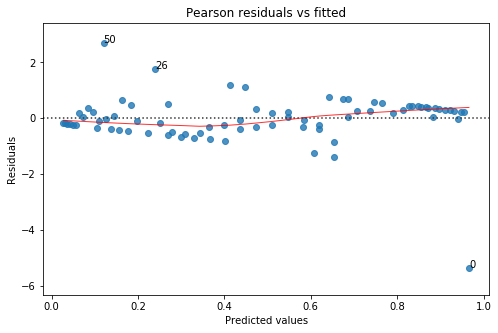

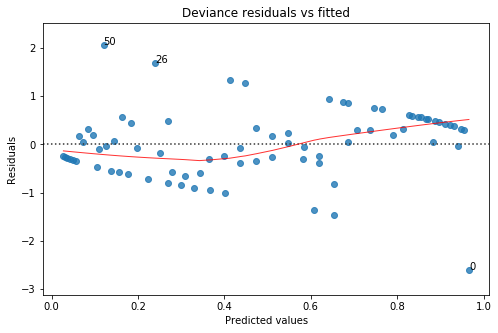

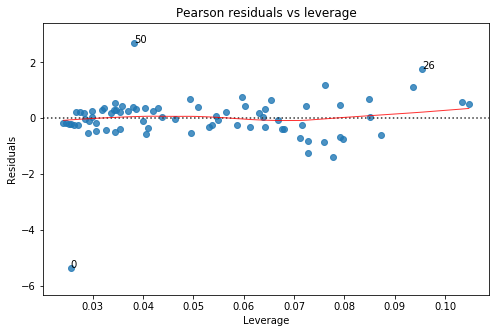

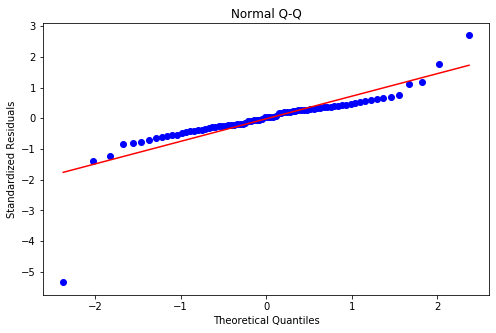

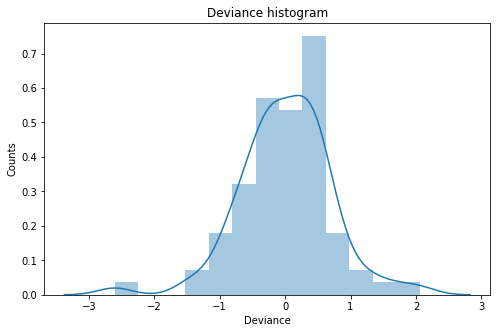

In [90]:
fig2 = glm_residplot(prop_model_result)

## Crimes sur les campus

Cet exercice va nous permettre d'aborder la régression de Poisson. 

Aux US, les étudiants veulent se sentir en sécurité lorsqu'ils fréquentent un collège ou une université. En réponse à la législation, le ministère américain de l'éducation cherche à fournir des données et à rassurer les étudiants et les parents. Tous les établissements d'enseignement supérieur qui participent aux programmes fédéraux d'aide aux étudiants sont tenus, en vertu de la Jeanne Clery Disclosure of Campus Security Policy and Campus Crime Statistics Act et de la Higher Education Opportunity Act, de recueillir et de communiquer au ministère de l'éducation des données sur les délits commis sur les campus. Ces données sont ensuite mises à la disposition du public sur le site web du Bureau de l'éducation postsecondaire. Nous cherchons à savoir s'il existe des différences régionales en matière de criminalité violente sur les campus, en tenant compte des différences de type d'école.

Chaque ligne du site c_data.csv contient des informations sur la criminalité provenant d'un établissement d'enseignement supérieur, que ce soit un collège ou une université. Les variables comprennent :


- Enrollment = enrollment at the school
- type = college (C) or university (U)
- nv = the number of violent crimes for that institution for the given year
- nvrate = number of violent crimes per 1000 students
- enroll1000 = enrollment at the school, in thousands
- region = region of the country (C = Central, MW = Midwest, NE = Northeast, SE = Southeast, SW = Southwest, and W = West)

### Lecture et analyse

>Vous commencerez par charger le fichier de données, `c_data.csv`, afficherez les premières lignes et les infos de type des données. Quelles sont les données quantitatives, catégorielles, ordinales ? 

In [92]:
data = pd.read_csv("c_data.csv")
print(data.head())
data.info()

   Enrollment type  nv    nvrate  enroll1000 region
0        5590    U  30  5.366726       5.590     SE
1         540    C   0  0.000000       0.540     SE
2       35747    U  23  0.643411      35.747      W
3       28176    C   1  0.035491      28.176      W
4       10568    U   1  0.094625      10.568     SW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
Enrollment    81 non-null int64
type          81 non-null object
nv            81 non-null int64
nvrate        81 non-null float64
enroll1000    81 non-null float64
region        81 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 3.9+ KB


> Considérez la variable `nv`. Quelle devrait être la nature et la distribution de cette variable ? Tracer son histogramme pour vous faire ou confimer une idée. 

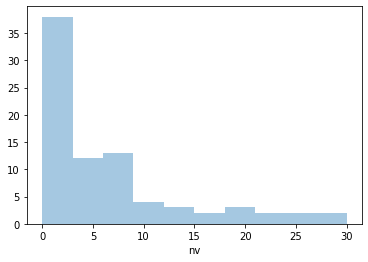

In [93]:
sns.distplot(data.nv,kde=False)

> Examiner quelles sont les proportions des collèges et universités dans chaque région. Vous devriez pouvoir afficher cela avec pd.crosstab et le paramètre normalize='columns'

In [95]:
tab = pd.crosstab(index=data.type,columns=data.region,normalize='columns')
tab

region,C,MW,NE,SE,SW,W
type,,,,,,
C,0.294118,0.3,0.380952,0.4,0.2,0.5
U,0.705882,0.7,0.619048,0.6,0.8,0.5


> Pour poursuivre l'exploration, définir une table affichant les moyennes, écrat-type ou variance pour les variables `nv`et `nvrate`. Typiquement, vous pourrez utiliser une table croisée `pivot_table`, avec comme paramètre d'aggrégation `aggfunc=['count', 'mean', 'std']`

In [96]:
pivot_t = pd.pivot_table(data,index=["region","type"],values=["nv","nvrate"],aggfunc=['count','mean','std'])


In [97]:
pivot_t

count              mean                 std          
               nv nvrate         nv    nvrate        nv    nvrate
region type                                                      
C      C        5      5   1.600000  0.397952  1.816590  0.527344
       U       12     12   4.750000  0.221944  5.561638  0.186887
MW     C        3      3   0.333333  0.016263  0.577350  0.028169
       U        7      7   8.714286  0.401900  5.559205  0.249148
NE     C        8      8   6.000000  1.124988  5.732115  1.087244
       U       13     13   5.923077  0.435927  8.901887  0.620511
SE     C        6      6   1.500000  0.248799  2.738613  0.357819
       U        9      9  12.777778  1.233761  9.257129  1.645933
SW     C        2      2   0.000000  0.000000  0.000000  0.000000
       U        8      8   6.625000  0.425491  9.318760  0.442505
W      C        4      4   0.500000  0.068016  0.577350  0.113611
       U        4      4  12.500000  0.467948  7.549834  0.157057

In [98]:
"""Ce tableau montre que les variances sont beaucoup plus élevées que les moyeness dans presque tous les groupes. Nous avons donc des raisons de remettre en question l'hypothèse de régression de Poisson selon laquelle la variabilité est égale à la moyenne. Cela devra éventuelelemnt être pris en compte ensuite"""

"Ce tableau montre que les variances sont beaucoup plus élevées que les moyeness dans presque tous les groupes. Nous avons donc des raisons de remettre en question l'hypothèse de régression de Poisson selon laquelle la variabilité est égale à la moyenne. Cela devra éventuelelemnt être pris en compte ensuite"

> Tracer les boxplot de nvrate dans les différentes régions, et en fonction de la nature (type) d'établissement. Vous pouvez utiliser `sns.boxplot`, avec un paramètre `hue` qui serait le type. 

In [99]:
sns.set(
    context='paper',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)

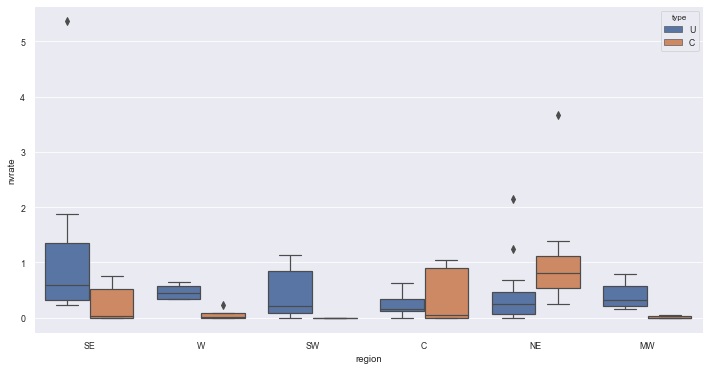

In [100]:
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='nvrate', hue='type', data=data)

> Il y a un outlier dans la région "SE" et un taux de 0 pour les collèges de SW. Il est alors décidé de 1) retirer l'outlier, 2) de fusionner les régions SE et SW en une seule région S. Faites-le ! (vous pourrez utiliser un drop et .replace)

In [101]:
data.region = data.region.replace("SE","S").replace("SW","S")
data = data.drop(data[data.nvrate>5].index)

> Retracer les boxplots après cette correction. 

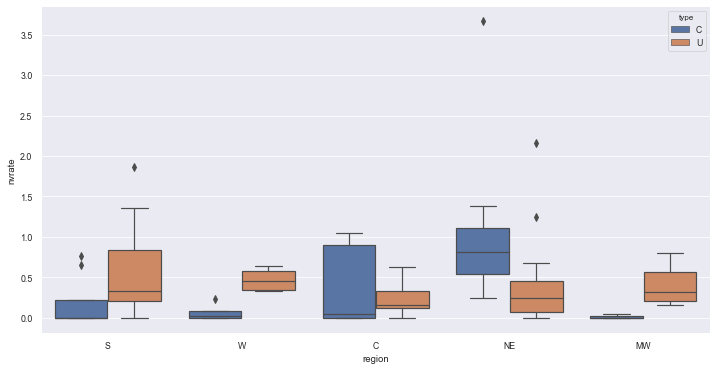

In [102]:
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='nvrate', hue='type', data=data)

### Modèle de Poisson

####  Notion de  modèle de Poisson et d'offset

Lorsqu'on a affaire à des problèmes de comptages, on fait souvent appel à une loi de Poisson ; et la moyenne de ces comptes, $\lambda$ est le paramètre d'une loi de Poisson. Cependant, les nombres de violences sont évidemment liées au nombre d'étudiants, et comme les universités et collèges ont un nombre d'étudiants différents, il y a un problème d'échantillonnage statitique. Il faut tenir compte des différences de populations, et par exemple travailler avec des taux. On normalise chaque "catégorie" par le nombre d'étudiants et on obtient des  proportions. Ceci fait apparaître dans le modèle un terme d'`offset`, dont le coefficient est fixé à 1. 

$$\log(\frac{\lambda}{enrollment}) = \beta_0 + \beta_1 type$$

$$\log(\lambda) = \beta_0 + \beta_1 type - \log(enrollment)$$

#### Régression de Poisson

Mettons donc en oeuvre une régressiond e Poisson pour prédire le nobre de vilences, avec un offset qui corrige pour les effectifs, et en fonction des variables type et region

In [103]:
model = smf.glm(formula="nv ~ type + region",data=data,family=sm.families.Poisson(),offset = np.log(data.enroll1000))
result = model.fit()
GLMsummary(result)

Dep. Variable:,nv,No. Observations:,80
Model:,GLM,Df Residuals:,74
Model Family:,Poisson,Df Model:,5
Link Function:,log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-280.66
Date:,"Wed, 24 Nov 2021",Deviance:,348.68
Time:,10:28:20,Pearson chi2:,409.
No. Iterations:,5,,
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,-1.5478,0.171,-9.044,0.000,-1.883,-1.212,1.511819e-19,***
type[T.U],0.2796,0.133,2.100,0.036,0.019,0.541,3.575764e-02,*
region[T.MW],0.0991,0.178,0.558,0.577,-0.249,0.447,5.766213e-01,
region[T.NE],0.7781,0.153,5.084,0.000,0.478,1.078,3.702808e-07,***
region[T.S],0.5824,0.149,3.910,0.000,0.290,0.874,9.237789e-05,***
region[T.W],0.2628,0.188,1.401,0.161,-0.105,0.630,1.611722e-01,


> Ecrire ("sur le papier", pas de calculs), quel est le modèle pour le taux de crime, pour la région NE et pour la région centre. Vous devez obtenir un modèle multiplicatif. Que peut on dire sur le rapport entre ces taux ? Quel est, suivant la même démarche, entre les taux de crime entre univésités et collèges. 

Le coefficient estimé à 0,778 signifie que le taux de crimes violents pour 1 000 dans le Nord-Est est près de 2,2 (e^0,778) fois celui de la région centrale en tenant compte du type d'école.

De même, il apparaît que le taux de crimes est plus important de e^0.28 = 1.32 (32%) dans les universités par comparaison aux collèges...

L'analyse exploratoire suggère que l'effet du type d'institution puise varier suivant les régions. On peut essayer de modéliser cette variation par un terme d'interaction. 

> Introduire dans le modèle un terme d'interaction entre type et région. Afficher les résultats. En considérant les p-values, ce terme est-il utile ? le modèle s'est-il amélioré ?  

In [104]:
int_model = smf.glm(formula="nv ~ type + region+type:region",data=data,family=sm.families.Poisson(),offset = np.log(data.enroll1000))
int_result = int_model.fit()
GLMsummary(int_result)

Dep. Variable:,nv,No. Observations:,80
Model:,GLM,Df Residuals:,70
Model Family:,Poisson,Df Model:,9
Link Function:,log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-244.67
Date:,"Wed, 24 Nov 2021",Deviance:,276.70
Time:,10:35:26,Pearson chi2:,311.
No. Iterations:,7,,
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,-1.4741,0.354,-4.169,0.000,-2.167,-0.781,0.000031,***
type[T.U],0.1959,0.378,0.519,0.604,-0.544,0.936,0.603771,
region[T.MW],-1.9765,1.061,-1.863,0.062,-4.055,0.102,0.062395,.
region[T.NE],1.5529,0.382,4.066,0.000,0.804,2.301,0.000048,***
region[T.S],-0.1562,0.486,-0.322,0.748,-1.109,0.796,0.747792,
region[T.W],-1.8337,0.791,-2.319,0.020,-3.383,-0.284,0.020372,*
type[T.U]:region[T.MW],2.1965,1.077,2.040,0.041,0.086,4.306,0.041321,*
type[T.U]:region[T.NE],-1.0698,0.420,-2.547,0.011,-1.893,-0.247,0.010856,*
type[T.U]:region[T.S],0.8121,0.511,1.590,0.112,-0.189,1.813,0.111848,
type[T.U]:region[T.W],2.4106,0.814,2.962,0.003,0.815,4.006,0.003061,**


Les p-values sur les termes d'interaction montrent que ceux-ci sont significatifs. Par ailleurs l'évolution de l'AIC confirme que le modèle s'est amélioré. 

> Tracer les graphes de diagnostic

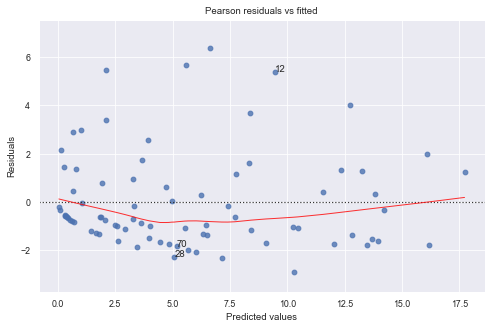

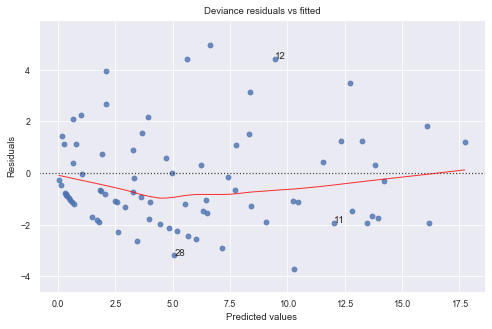

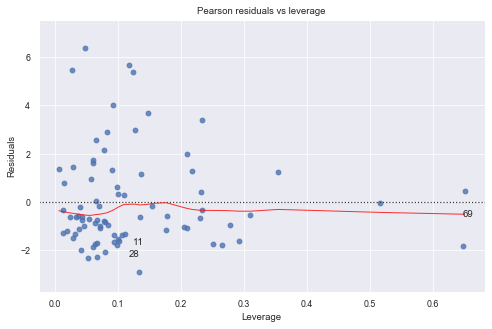

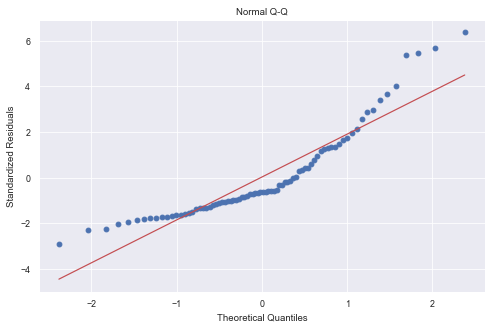

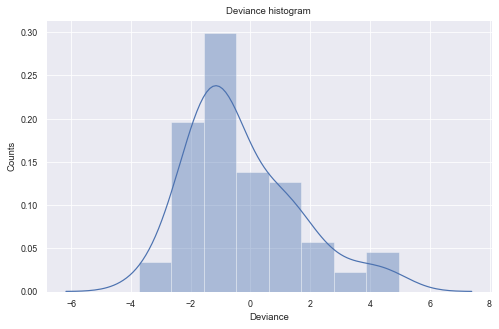

In [105]:
glm_residplot(int_result)

#### Régression avec une binomiale négative

Cependant deux choses restent ennuyeuses : (a) la déviance reste importante (b) les observations ne semblent pas vraiment Poisson, car la variance devrait être égale à la moyenne et est bien plus importante. Une manière de traiter cela est (éventuellement) d'utiliser un autre modèle statistique et la binomiale négative  est une bon candidat. Rappelons que la binomiale négative apparaît lorsque le paramètre d'une lio de Poisson est lui-même aléatoire et suit une loi Gamma. On a deux niveaux d'aléatoire qui se traduisent par une augmentation dela variance. 

> Mettre en oeuvre ! (la lien canonique est toujours un log ; on pourra donc conserver l'offset). La famille est `sm.families.NegativeBinomial()` 

In [109]:
bin_model = smf.glm(data=data,formula="nv ~ type + region + type:region",offset=np.log(data.enroll1000),family=sm.families.NegativeBinomial())
bin_result = bin_model.fit()
GLMsummary(bin_result)

Dep. Variable:,nv,No. Observations:,80
Model:,GLM,Df Residuals:,70
Model Family:,NegativeBinomial,Df Model:,9
Link Function:,log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-195.05
Date:,"Wed, 24 Nov 2021",Deviance:,59.103
Time:,10:41:31,Pearson chi2:,58.5
No. Iterations:,8,,
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,-0.9648,0.575,-1.677,0.093,-2.092,0.163,0.093460,.
type[T.U],-0.4844,0.663,-0.731,0.465,-1.784,0.815,0.465005,
region[T.MW],-2.5780,1.387,-1.859,0.063,-5.296,0.141,0.063082,.
region[T.NE],1.0917,0.693,1.575,0.115,-0.267,2.450,0.115271,
region[T.S],-0.6687,0.793,-0.843,0.399,-2.223,0.886,0.399216,
region[T.W],-2.2223,1.045,-2.127,0.033,-4.270,-0.174,0.033455,*
type[T.U]:region[T.MW],3.0983,1.482,2.091,0.037,0.194,6.003,0.036551,*
type[T.U]:region[T.NE],-0.4883,0.828,-0.590,0.555,-2.111,1.134,0.555326,
type[T.U]:region[T.S],1.5260,0.901,1.693,0.090,-0.240,3.292,0.090408,.
type[T.U]:region[T.W],2.9162,1.214,2.403,0.016,0.538,5.295,0.016266,*


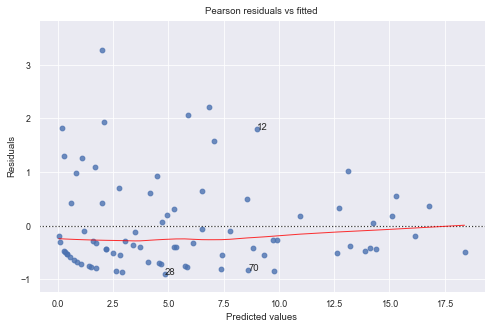

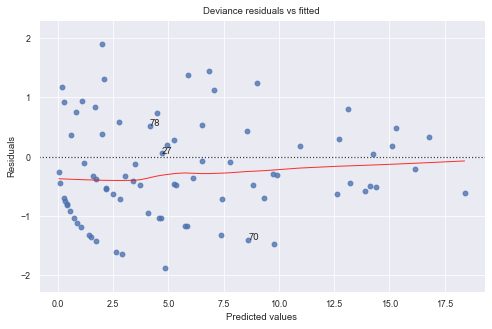

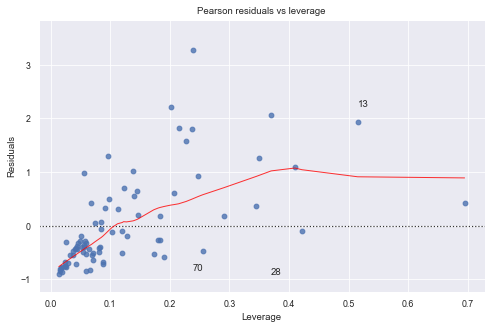

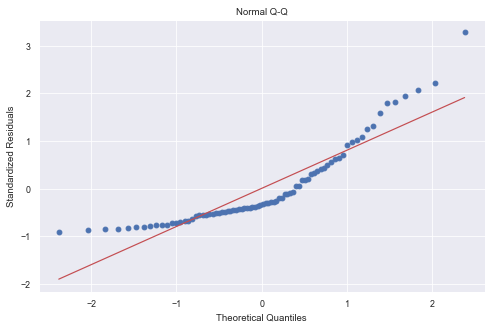

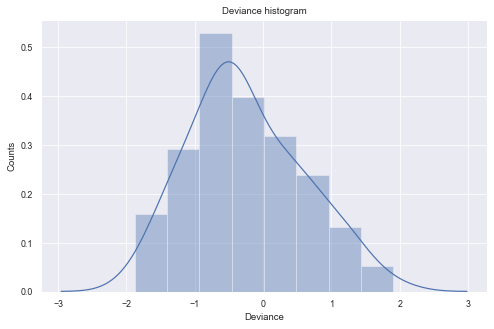

In [110]:
glm_residplot(bin_result)

Les graphes de diagnostic ne sont pas sensiblement différents, et il manque de la normalité dans les résidus. L'AIC s'est amélioré ce qui indique que le modèle est mieux adapté. Cependant les résidus reste relativement importants avec des pattern visibles. Il peut y avoir encore du travail. De plus, il est fort possible qu'il y ait d'autres variables explicatives à prendre en compte qui complèteraient utilement les qualques variables présentes. S'il y a de l'info manquante dans les données, on ne peut pas faire de miracle ! 


## Réussite en maths

Il s'agit d'un autre exercice sur la régression binomiale, que vous pourriez passer dans un premier temps. 

Le jeu de données rapporte des taux de réussiteen mathématiques,e n fonction de différents paramètres. On est donc dans une situation Succès/échecs modélisés par une loi binomiale.

### Lecture et analyse

>- Vous lirez les données via `sm.datasets.star98.load_pandas().data`
>- et vous pourrez consulter la description par `print(sm.datasets.star98.NOTE)`

In [116]:
data = sm.datasets.star98.load_pandas().data
data

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,...,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.918370,14.70646,59.15732,4.445207,...,0.0,22.222220,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.636360,16.08324,59.50397,5.267598,...,0.0,0.000000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
2,337.0,234.0,32.64324,9.226386,42.406310,13.543720,28.834360,14.59559,60.56992,5.482922,...,0.0,0.000000,420.854496,1746.49488,884.0537,103.92435,295.75929,1022.4252,25491.1232,5605.8777
3,395.0,178.0,11.90953,13.883090,3.796973,11.443110,11.111110,14.38939,58.33411,4.165093,...,0.0,7.142857,159.882095,648.15671,839.3923,90.11341,204.34375,1061.4545,9326.5797,4421.0568
4,8.0,57.0,36.88889,12.187500,76.875000,7.604167,43.589740,13.90568,63.15364,4.324902,...,0.0,0.000000,606.144976,2752.85075,878.1943,81.22097,226.54248,983.7059,38280.2616,4254.4314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,96.0,246.0,62.23968,13.820860,3.956157,32.128790,15.884480,13.27089,52.88133,4.324174,...,0.0,18.181820,210.801187,839.99243,701.7823,90.75192,34.59339,167.8969,11147.4471,726.0153
299,37.0,117.0,46.16188,1.150575,0.800400,45.622810,13.333330,11.80714,48.42615,3.945069,...,0.0,0.000000,157.428494,645.68184,571.7743,78.34236,212.14048,1067.8519,7623.6559,4212.7494
300,208.0,387.0,43.41431,3.648564,1.541204,46.319980,21.377670,14.40468,53.79616,3.845481,...,0.0,6.666667,307.938495,1150.03656,774.9165,87.32641,114.95093,678.8233,16565.9086,2610.4022
301,199.0,510.0,70.62104,20.461720,2.989345,17.423050,11.032860,16.56420,61.70566,3.970984,...,0.0,13.636360,182.750500,680.78991,1022.1049,98.82377,60.13205,376.8523,11276.7402,1496.4746


In [112]:
print(sm.datasets.star98.NOTE)

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income students
        PERASIAN - Percentage of Asian student
        PERBLACK - Percentage of black students
        PERHISP  - Percentage of Hispanic students
        PERMINTE - Percentage of minority teachers
        AVYRSEXP - Sum of teachers' years in educational service divided by the
                number of teachers.
        AVSALK   - Total salary budget including benefits divided by the number
                   of full-time teachers (in thousands)
        PERSPENK - Per-pupil spending (in thousands)
        PTRATIO  - Pupil-teacher ratio.
        PCTAF    - Percenta

### Régression

> Mettre en oeuvre une régression binomiale pour `NABOVE + NBELOW` en fonction de l'ensemble des variables (*sans* les termes d'interaction)

In [113]:
model_binomial = smf.glm(formula="NABOVE + NBELOW ~ LOWINC + PERASIAN + PERBLACK + PERHISP + PCTCHRT + PCTYRRND",data=data,family=sm.families.Binomial())
model_binomial_result = model_binomial.fit()
GLMsummary(model_binomial_result)

Dep. Variable:,"['NABOVE', 'NBELOW']",No. Observations:,303
Model:,GLM,Df Residuals:,296
Model Family:,Binomial,Df Model:,6
Link Function:,logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-3576.7
Date:,"Wed, 24 Nov 2021",Deviance:,5234.9
Time:,10:49:52,Pearson chi2:,5.09e+03
No. Iterations:,4,,
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,0.9175,0.012,78.709,0.000,0.895,0.940,0.000000e+00,***
LOWINC,-0.0160,0.000,-42.939,0.000,-0.017,-0.015,0.000000e+00,***
PERASIAN,0.0141,0.000,28.314,0.000,0.013,0.015,2.347270e-176,***
PERBLACK,-0.0158,0.001,-29.428,0.000,-0.017,-0.015,2.432741e-190,***
PERHISP,-0.0122,0.000,-38.284,0.000,-0.013,-0.012,0.000000e+00,***
PCTCHRT,0.0037,0.001,3.117,0.002,0.001,0.006,1.824463e-03,**
PCTYRRND,-0.0035,0.000,-17.554,0.000,-0.004,-0.003,5.527180e-69,***


> Mettre en oeuvre une régression binomiale pour `NABOVE + NBELOW` en fonction de l'ensemble des variables  et en ajoutant des termes d'interaction via `PERMINTE*AVYRSEXP*AVSALK + PERSPENK*PTRATIO*PCTAF`
> Comment évolue l'AIC, les coefficients sont-ils significatifs ? 

In [114]:
model_binomial = smf.glm(formula="NABOVE + NBELOW ~ LOWINC + PERASIAN + PERBLACK + PERHISP + PCTCHRT + PCTYRRND + \
    PERMINTE*AVYRSEXP*AVSALK + PERSPENK*PTRATIO*PCTAF",data=data,family=sm.families.Binomial())
model_binomial_result = model_binomial.fit()
GLMsummary(model_binomial_result)

Dep. Variable:,"['NABOVE', 'NBELOW']",No. Observations:,303
Model:,GLM,Df Residuals:,282
Model Family:,Binomial,Df Model:,20
Link Function:,logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-2998.6
Date:,"Wed, 24 Nov 2021",Deviance:,4078.8
Time:,10:51:52,Pearson chi2:,4.05e+03
No. Iterations:,5,,
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,2.9589,1.547,1.913,0.056,-0.073,5.990,5.574577e-02,.
LOWINC,-0.0168,0.000,-38.749,0.000,-0.018,-0.016,0.000000e+00,***
PERASIAN,0.0099,0.001,16.505,0.000,0.009,0.011,3.392690e-61,***
PERBLACK,-0.0187,0.001,-25.182,0.000,-0.020,-0.017,6.276757e-140,***
PERHISP,-0.0142,0.000,-32.818,0.000,-0.015,-0.013,3.269482e-236,***
PCTCHRT,0.0049,0.001,3.921,0.000,0.002,0.007,8.810637e-05,***
PCTYRRND,-0.0036,0.000,-15.878,0.000,-0.004,-0.003,8.962276e-57,***
PERMINTE,0.2545,0.030,8.498,0.000,0.196,0.313,1.924040e-17,***
AVYRSEXP,0.2407,0.057,4.212,0.000,0.129,0.353,2.525627e-05,***
PERMINTE:AVYRSEXP,-0.0141,0.002,-7.391,0.000,-0.018,-0.010,1.457877e-13,***


Le modèle étant obtenu, comparons sa capacité de prédiction des proportions et les proportions de succèes effectives dans les données. Pour ce faire,

> - Calculer  les prédictions, en utilisant `res.predict`
> - Calculer les proportions effectives dans les données
Comparer ces deux quantités, par exemple en traçant l'une en fonction de l'autre. 

> Si on persiste à augmenter le nombre de termes, via des interactions, en ajoutant `PERASIAN*PERBLACK*PERHISP*PCTCHRT*PCTYRRND`, que devbient l'AIC et la signification des variables ,  

> Retirer quelques variables non significatives et réitérez. Evolution de l'AIC ? 

## Richesse écologique

On traite à nouveau un problème de comptage, avec une régression de Poisson. 

Les données de cet exercice ont été recueillies au cours d'une expérience qui a permis d'étudier la relation entre le nombre d'espèces végétales et la biomasse végétale cultivée dans des parcelles ayant subi trois traitements à pH contrôlé : faible, moyen et élevé. La recherche vise à déterminer si l'augmentation de la biomasse a un effet sur la richesse des espèces et si cet effet peut être modulé par le pH. Par conséquent, l'espèce est la variable de réponse et le pH et la biomasse sont des variables explicatives. Comme le nombre d'espèces est un compte (positif et entier), nous tenterons d'ajuster une distribution de Poisson à ces données.



### Lecture et analyse
>Charger le fichier `species.txt` et procéder à une exploration préliminaire. Combien de variables, de données, dépendances, histogrammes, boxplot...

#### Tracés

distplot, boxplot, pairplot, 

#### Tests statistiques 

Une fois n'est pas coutume, on va effectuer un test statistque pour tester si nos différents groupes de pH sont significatifs, et doivent donc être pris en compte en tant que variables explicatives distinctes. Pour cela, on va utiliser un ttest et une anova. 

> Vous mettrez en oeuvre un ttest à partir de `sm.stats.ttest_ind(..)`
> Une anova à partie de `oneway` provenant de  `import statsmodels.stats.oneway as oneway`

In [31]:
low = species['pH']=='low'
mid = species['pH']=='mid'
high = species['pH']=='high'


In [9]:
import statsmodels.stats.oneway as oneway

### Premier modèle. 

Les données sont donc des comptages et l'hypothèse comme quoi la réponse serait Poisson n'est pas déraisonnable. On envisage donc une régression de Poisson, avec un glm utilisant la famille de Poisson (et par défaut un lien en log). 

>Effectuez la régression de Species en fonction de Biomass : : définissez le modèle, apprenez le (méthode.fit) et affichez le résumé (attribut summary). 

> Selon ce modèle, quelle serait la valeur prédite (calcul "à la main") sur le log(mu) lorsque la biomasse = 5 ? Qu'est-ce que cela deviendrait sur l'échelle de la réponse, c'est-à-dire le nombre d'espèces ?

### 2e modèle

> Ajouter maintenant la variable explicative `pH`, et éventuellement un terme d'interaction. Comment évolue le modèle ? 

### diagnostic 

#### Tracez les quelques figures de diagnostic


En utilisant le fonction `glm_residplot(res)`

#### Exploitation des prédictions

> Utilisez `predict()` ou `get_prediction().summary_frame()` pour obtenir les prédictions. Tracez la relation entre le nombre d'espèces et la biomasse pour chaque niveau de pH, ainsi que les données de départ. Pourquoi les courbes ne sont-elles pas des lignes ?

> Dans la  mesure où nous disposons dans le `summary_frame` des intervalles de confiance, autant l'utiliser... Ajouter un intervalle de confiance à vos tracés.. 

## Quine Data

La description des données est ici
https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/quine.html

Pas fini !

## Régression linéaire

Il s'agit d'un GLM avec hypothèse gaussienne... 

Si vous vouliez revoir la régression linéaire, ou si vous avez terminé le TP en avance, nous vous invitions à vous pencher sur [Lab-BostonMedvPrediction_sujet_python.ipynb](Lab-BostonMedvPrediction_sujet_python.ipynb)